In [1]:
import pandas as pd

decision_matrix = pd.read_csv("data/decision_matrix.csv")
decision_matrix


,Model,Accuracy,F1-score,Precision,Inference Time (ms),Model Size (MB)
0,BERT,0.496667,0.025806,0.400000,519.720859,417.647469
1,DistilBERT,0.506667,0.026316,1.000000,246.064145,255.413094
2,ALBERT,0.483333,0.645309,0.491289,550.528887,44.575203
3,ELECTRA,0.496667,0.654462,0.498258,494.411416,417.647469
4,RoBERTa,0.490000,0.231156,0.469388,495.341160,475.491219


In [2]:
import numpy as np
import matplotlib.pyplot as plt

weights = np.array([0.25, 0.20, 0.15, 0.20, 0.20])
impacts = np.array([1, 1, 1, -1, -1])


In [3]:
matrix = decision_matrix.iloc[:, 1:].values.astype(float)


In [4]:
norm_matrix = matrix / np.sqrt((matrix ** 2).sum(axis=0))


In [5]:
weighted_matrix = norm_matrix * weights


In [6]:
ideal_best = np.where(
    impacts == 1,
    weighted_matrix.max(axis=0),
    weighted_matrix.min(axis=0)
)

ideal_worst = np.where(
    impacts == 1,
    weighted_matrix.min(axis=0),
    weighted_matrix.max(axis=0)
)


In [7]:
dist_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))


In [8]:
decision_matrix["TOPSIS Score"] = dist_worst / (dist_best + dist_worst)
decision_matrix["Rank"] = decision_matrix["TOPSIS Score"].rank(
    ascending=False, method="dense"
)

decision_matrix.sort_values("Rank")


,Model,Accuracy,F1-score,Precision,Inference Time (ms),Model Size (MB),TOPSIS Score,Rank
2,ALBERT,0.483333,0.645309,0.491289,550.528887,44.575203,0.678593,1.0
3,ELECTRA,0.496667,0.654462,0.498258,494.411416,417.647469,0.532406,2.0
1,DistilBERT,0.506667,0.026316,1.000000,246.064145,255.413094,0.420277,3.0
4,RoBERTa,0.490000,0.231156,0.469388,495.341160,475.491219,0.221835,4.0
0,BERT,0.496667,0.025806,0.400000,519.720859,417.647469,0.079984,5.0


In [9]:
decision_matrix.to_csv("data/topsis_result.csv", index=False)


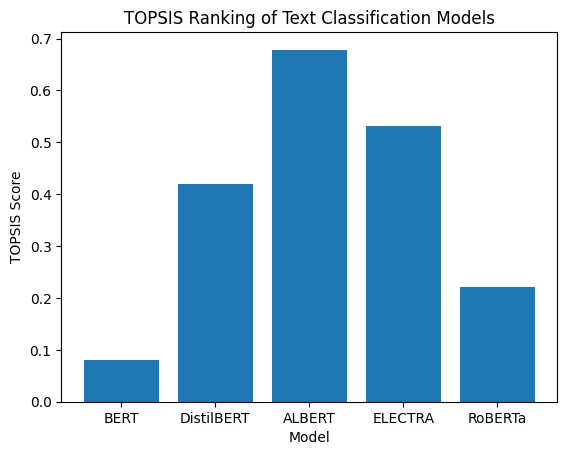

In [10]:
plt.figure()
plt.bar(decision_matrix["Model"], decision_matrix["TOPSIS Score"])
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking of Text Classification Models")
plt.show()
